In [267]:
import numpy as np
import matplotlib.pyplot as plt

## Poisson Dağılımı Class Yapısı

In [268]:
class poisson_dist:
    
    # Poisson Olasılık hesabı için yardımcı metod
    def factorial(self, number):
        self.sum = 1
        if number == 0:
            return 1
        for k in range(1, number+1):
            self.sum *= k
        return self.sum
    
     # Verilen ortalama (mu) ve istenen (k:başarı sayısı ) için poisson değeri hesaplaması
    def poisson_value(self, mu, k):
        return np.e**-mu * mu**k / self.factorial(k)
    
    # 0 - k değerleri arasında Olasılık kütle fonksiyonu hesaplaması
    def poisson_pmf(self, mu, k):
        self.pmf = []
        for i in range(k+1):
            self.pmf.append(self.poisson_value(mu, i))
        return self.pmf
    
    #0 - k değerleri arasında birikimli dağılım fonksiyonu hesaplaması
    def poisson_cdf(self, mu, k):
        prob_sum = 0
        self.cdf = []
        for i in range(k+1):
            if prob_sum <= 1:
                prob_sum += self.poisson_value(mu, i)
            else:
                prob_sum = 0
            self.cdf.append(prob_sum)
        return self.cdf
    
    # Poisson Ortalama değer hesaplama
    def mean(self, mu, k):
        _sum = 0
        _mean = 0
        i = 0
        while (1):
            _sum += self.poisson_value(mu, i)
            _mean += i*self.poisson_value(mu, i)
            if _sum >=1:
                break
            i+=1
        return _mean
    
    # Poisson Varyans hesaplama
    def variance(self, mu, k):
        _sum = 0
        _mean= 0
        _meanSquare = 0
        i = 0
        while (1):
            _sum += self.poisson_value(mu, i)
            _mean += i*self.poisson_value(mu, i)
            _meanSquare += i**2*self.poisson_value(mu, i)
            if _sum >=1:
                break
            i+=1
        _variance = _meanSquare - _mean**2
        return _variance
        
    # 0 - k aralığında olasılık kütle fonksiyonu ve birikimli dağılım fonksiyonu grafik çizimi
    def poisson_graph(self,mu, k):
        fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4))
        ax1.bar(range(k+1), self.poisson_pmf(mu,k), color = "black", label = r"$\lambda$ = {}".format(mu))
        ax2.bar(range(k+1), self.poisson_cdf(mu,k), color = "red", label = r"$\lambda$ = {}".format(mu))
        
        ax1.set_title("Olasılık Kütle Fonksiyonu", fontweight = "bold")
        ax1.set_ylabel("P(X = i)", fontweight = "bold")
        ax1.set_xlabel("i", fontweight = "bold")
        ax1.legend()
        
        ax2.set_title("Birikimli Dağılım Fonksiyonu", fontweight = "bold")
        ax2.set_ylabel(r"$\sum_{i=0}^{\infty}p(i)$", fontweight = "bold", fontsize = 12)
        ax2.set_xlabel("i", fontweight = "bold")
        ax2.legend()

## Türkiyedeki havacılık kazaları için poisson hesaplamaları

In [276]:
model1 = poisson_dist() 

In [278]:
model1.poisson_value(mu = 1, k = 0) # Hiç uçak kazası olmama ihtimali

0.36787944117144233

In [275]:
model1.poisson_value(mu = 1, k = 1) # 1 uçak kazası olma ihtimali

0.36787944117144233

In [273]:
model1.poisson_value(mu = 1, k = 2) # 2 uçak kazası olma ihtimali

0.18393972058572117

In [313]:
model1.mean(mu = 1, k = 2) # Ortalama Değer 

0.9999999999999999

In [314]:
model1.variance(mu = 1, k = 2) # Varyans

0.9999999999999991

In [279]:
model1.poisson_pmf(mu = 1, k = 5) # k = 0 - 5 aralığında olasılık kütle fonksiyonu

[0.36787944117144233,
 0.36787944117144233,
 0.18393972058572117,
 0.06131324019524039,
 0.015328310048810098,
 0.0030656620097620196]

In [280]:
model1.poisson_cdf(mu = 1, k = 5) # k = 0 - 5 aralığında birikimli dağılım fonksiyonu

[0.36787944117144233,
 0.7357588823428847,
 0.9196986029286058,
 0.9810118431238463,
 0.9963401531726563,
 0.9994058151824183]

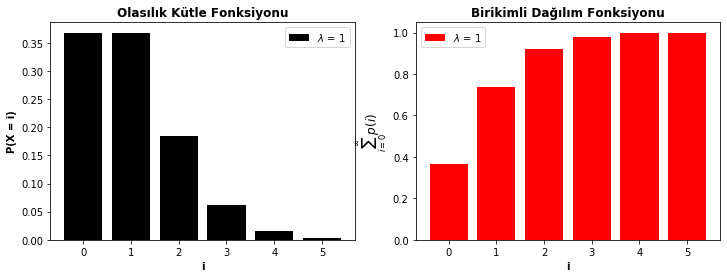

In [281]:
model1.poisson_graph(mu = 1, k = 5)

## Poisson Dağılımı - Binomial Dağılım İlişkisi

### Binomial Dağılım Hesaplanması için Kod Yapısı

In [ ]:
def Combination(n,r):
    numerator = 1
    denominator = 1
    for i in range(n-r+1,n+1):
        numerator *=i
        
    for i in range(1,r+1):
        denominator *=i

    return (numerator/ denominator)

def binomial(n, x, p):
    # n: deneme sayisi, x: başarı sayısı p: başarı olasılığı
    
    return Combination(n,x)*p**x*(1-p)**(n-x)

In [289]:
n = np.arange(10,1000)
p = 0.005
x = 6
poisson_mu_value = n*p

In [294]:
binom_values = []
for k in n:
    binom_values.append(binomial(k,x,p))

In [297]:
poisson_values = []
model2 = poisson_dist()
for j in poisson_mu_value:
    poisson_values.append(model2.poisson_value(mu = j, k = x  ))

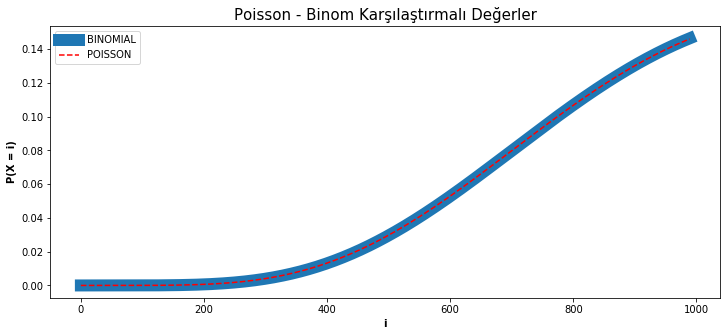

In [312]:
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(binom_values, linewidth =12, label = "BINOMIAL")
ax.plot(poisson_values, "--r", label = "POISSON")
ax.set_title("Poisson - Binom Karşılaştırmalı Değerler", fontsize = "15")
ax.set_ylabel("P(X = i)", fontweight = "bold")
ax.set_xlabel("i", fontweight = "bold")
ax.legend()